## Initial Setup

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv('../../data/MODIS_C6_USA_contiguous_and_Hawaii_7d.csv')
data.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'confidence', 'version', 'bright_t31', 'frp',
       'daynight'],
      dtype='object')

## Data Analysis

In [57]:
# Features X and Predictor Y Split

Y = data['confidence']
X = data.drop(['scan','satellite','track','version','acq_date',
       'acq_time'],axis=1)

print(data.head())
print(X.shape)
print(Y.shape)



   latitude  longitude  brightness  scan  ...  version bright_t31   frp daynight
0    39.884    -78.246       300.3   1.4  ...   6.0NRT      284.0  10.4        N
1    18.639    -96.216       308.0   1.4  ...   6.0NRT      291.3  10.4        N
2    40.595   -105.702       303.1   1.9  ...   6.0NRT      278.5  23.4        N
3    40.696   -105.729       322.6   1.9  ...   6.0NRT      283.9  54.7        N
4    40.705   -105.718       321.3   1.9  ...   6.0NRT      282.8  49.1        N

[5 rows x 13 columns]
(8805, 7)
(8805,)


            latitude  longitude  brightness  confidence  bright_t31       frp
latitude    1.000000  -0.515848    0.187853    0.158099   -0.114797  0.106087
longitude  -0.515848   1.000000   -0.150379   -0.156270   -0.124711 -0.018051
brightness  0.187853  -0.150379    1.000000    0.573781    0.595725  0.584930
confidence  0.158099  -0.156270    0.573781    1.000000    0.277855  0.222958
bright_t31 -0.114797  -0.124711    0.595725    0.277855    1.000000  0.326094
frp         0.106087  -0.018051    0.584930    0.222958    0.326094  1.000000


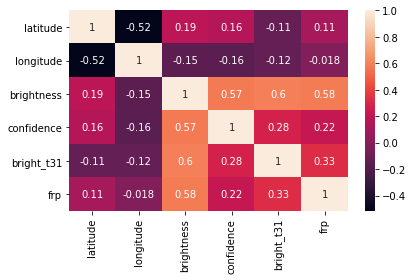

In [60]:
# Data Analysis / Correlation Matrix of the dataset

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = X.corr()
print(corrMatrix)
sn.heatmap(corrMatrix, annot=True)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/NASA_Space_App/NasaChallenge-master/data/stats/corr_matrix.png', dpi=600)

## Machine Learning Model

In [53]:
#Train:Validation Split

#Time-Period: 

x_train, x_valid, y_train, y_valid = train_test_split(X, Y,
                                                    test_size=0.3,
                                                    random_state=0,
                                                    stratify=Y)



(6163, 5)
(6163,)


In [54]:
#verification

print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(6163, 5)
(6163,)
(2642, 5)
(2642,)


Coefficients: 
 [-0.07474392 -0.14767007  0.61472052 -0.31103454 -0.0116055 ]
Mean squared error: 401.46
Coefficient of determination: 0.35


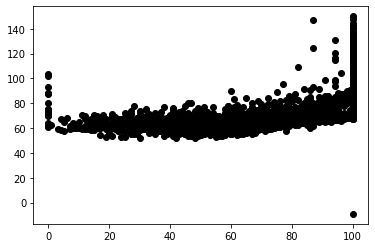

In [63]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the validation set
y_pred = regr.predict(x_valid)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_valid, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_valid, y_pred))

# Plot outputs
plt.scatter(y_valid, y_pred, color='black')

plt.show()



In [42]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators = 100, max_depth = 15)
rf.fit(x_train, y_train.ravel())

#Evaluating the model on train data
y_hat = rf.predict(x_train)
print ('Train Accuracy:',rf.score(x_train, y_train))

#Testing the model on validation data
y_pred = rf.predict(x_valid)
print ('Validation Accuracy:',rf.score(x_valid, y_valid))

Train Accuracy: 0.9922115852669154
Validation Accuracy: 0.334216502649508
